In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd 
import requests
import json
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

# Google API Key
from config import gkey

file_path = "Resources/winemag-data_first150k.csv"
data = pd.read_csv("Resources/winemag-data_first150k.csv") 

# Preview the first 50 lines of the loaded data
data.head(50)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [9]:
# Drop columns no needed
data.drop(columns=["Unnamed: 0", "description", "region_2"], inplace=True)

# Remove missing values
data.dropna(inplace=True)

#Order DataFrame Columns
data = data[["designation", "winery", "variety", "region_1", "province", "country", "price", "points"]]
data.head(10)

,designation,winery,variety,region_1,province,country,price,points
0,Martha's Vineyard,Heitz,Cabernet Sauvignon,Napa Valley,California,US,235.0,96
1,Carodorum Selección Especial Reserva,Bodega Carmen Rodríguez,Tinta de Toro,Toro,Northern Spain,Spain,110.0,96
2,Special Selected Late Harvest,Macauley,Sauvignon Blanc,Knights Valley,California,US,90.0,96
3,Reserve,Ponzi,Pinot Noir,Willamette Valley,Oregon,US,65.0,96
4,La Brûlade,Domaine de la Bégude,Provence red blend,Bandol,Provence,France,66.0,95
5,Numanthia,Numanthia,Tinta de Toro,Toro,Northern Spain,Spain,73.0,95
6,San Román,Maurodos,Tinta de Toro,Toro,Northern Spain,Spain,65.0,95
7,Carodorum Único Crianza,Bodega Carmen Rodríguez,Tinta de Toro,Toro,Northern Spain,Spain,110.0,95
8,Silice,Bergström,Pinot Noir,Chehalem Mountains,Oregon,US,65.0,95
9,Gap's Crown Vineyard,Blue Farm,Pinot Noir,Sonoma Coast,California,US,60.0,95


In [10]:
# Sample for project purpose
sample = data.sample(n=10, axis=0, random_state = 4)
sample.reset_index(drop = True, inplace=True)

sample

,designation,winery,variety,region_1,province,country,price,points
0,Thorn,Grant Burge,Riesling,Eden Valley,South Australia,Australia,19.0,88
1,Doganella Il Tintorosso,Tommasi,Red Blend,Maremma,Tuscany,Italy,15.0,87
2,Reserve,Castoro Cellars,Cabernet Sauvignon,Paso Robles,California,US,28.0,87
3,Ellenbach Vineyard,Etude,Pinot Noir,Sonoma Coast,California,US,60.0,90
4,Il Monovitigno,Benanti,Nero d'Avola,Sicilia,Sicily & Sardinia,Italy,30.0,88
5,Centine,Banfi,Rosé,Toscana,Tuscany,Italy,12.0,87
6,Crianza,Finca Antigua,Red Blend,La Mancha,Central Spain,Spain,12.0,85
7,Gypsy,Epiphany,Rhône-style Red Blend,Santa Barbara County,California,US,25.0,90
8,Reserve,Concannon,Syrah,Livermore Valley,California,US,24.0,89
9,Le Vigne,Sandrone,Nebbiolo,Barolo,Piedmont,Italy,118.0,86


In [11]:
sample["latitud"] = ""
sample["longitud"] = ""
sample["elevation"] = ""


# Build URL using the Google Geocoding API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Counter
count = 1

# Iterate dataframe for filling Latitud and Longitud columns
for index, row in sample.iterrows():
    
    # Build winery location search
    winery_loc = row["winery"] + "," + row["region_1"]  + "," +  row["province"]
    
    # Parameters for API request
    params = {"address": winery_loc, "key": gkey}
    
    try:

        # Run request
        response = requests.get(base_url, params=params)

        # Convert to JSON
        geo_data = response.json()

        # Extract lat/lng and fill columns
        sample.loc[index, 'latitud'] = geo_data["results"][0]["geometry"]["location"]["lat"]
        sample.loc[index, 'longitud'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    
        # print Winery location found
        print(f"Processing row {count} Winery location {winery_loc} {sample.loc[index, 'latitud']} {sample.loc[index, 'longitud']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Winery not found" )
        
#test.head(10)

# Counter
count = 1

# Iterate dataframe for filling Elevation column
for index, row in sample.iterrows():
    lat = row["latitud"]
    lng = row["longitud"]
    
    try:
        # Build URL using the Google Elevation API
        url_ele = f"https://maps.googleapis.com/maps/api/elevation/json?locations={lat},{lng}&key={gkey}"
        
        # Run request
        response = requests.get(url_ele)

        # Convert to JSON
        geo_data = response.json()

        # Extract elevation and fill column
        sample.loc[index, 'elevation'] = geo_data["results"][0]["elevation"]
    
        # print Winery elevation found
        print(f"Processing row {count} Winery elevation {sample.loc[index, 'elevation']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Elevation not found" )

#test.head(10)

sample.to_csv("Resources/winery_data.csv", index=False)


Processing row 1 Winery location Grant Burge,Eden Valley,South Australia -34.5615916 138.9754373 found
Processing row 2 Winery location Tommasi,Maremma,Tuscany 42.6086111 11.6966667 found
Processing row 3 Winery location Castoro Cellars,Paso Robles,California 35.5772607 -120.722921 found
Processing row 4 Winery location Etude,Sonoma Coast,California 38.2458215 -122.3150228 found
Processing row 5 Winery location Benanti,Sicilia,Sicily & Sardinia 37.5999938 14.0153557 found
Processing row 6 Winery location Banfi,Toscana,Tuscany 42.980621 11.400659 found
Processing row 7 Winery location Finca Antigua,La Mancha,Central Spain 39.6310835 -2.8920419 found
Processing row 8 Winery location Epiphany,Santa Barbara County,California 34.6669689 -120.1147479 found
Processing row 9 Winery location Concannon,Livermore Valley,California 37.666199 -121.7397388 found
Processing row 10 Winery location Sandrone,Barolo,Piedmont 44.6208903 7.954625300000001 found
Processing row1 Winery elevation 323.24249267

In [95]:
sample = pd.read_csv("Resources/winery_data.csv") 
sample.dropna(inplace=True)
print(sample.count())
sample.head()

designation    2912
winery         2912
variety        2912
region_1       2912
province       2912
country        2912
price          2912
points         2912
latitud        2912
longitud       2912
elevation      2912
dtype: int64


,designation,winery,variety,region_1,province,country,price,points,latitud,longitud,elevation
0,Thorn,Grant Burge,Riesling,Eden Valley,South Australia,Australia,19.0,88,-34.561592,138.975437,323.242493
1,Doganella Il Tintorosso,Tommasi,Red Blend,Maremma,Tuscany,Italy,15.0,87,42.608611,11.696667,354.988892
2,Reserve,Castoro Cellars,Cabernet Sauvignon,Paso Robles,California,US,28.0,87,35.577261,-120.722921,280.324707
3,Ellenbach Vineyard,Etude,Pinot Noir,Sonoma Coast,California,US,60.0,90,38.245822,-122.315023,16.873728
4,Il Monovitigno,Benanti,Nero d'Avola,Sicilia,Sicily & Sardinia,Italy,30.0,88,37.599994,14.015356,622.540649


In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
bycountry = pd.DataFrame(sample["price"].groupby(sample['country']).count())
bycountry

,price
country,
Argentina,131
Australia,135
Canada,3
France,314
Italy,569
Spain,224
US,1536


<IPython.core.display.Javascript object>


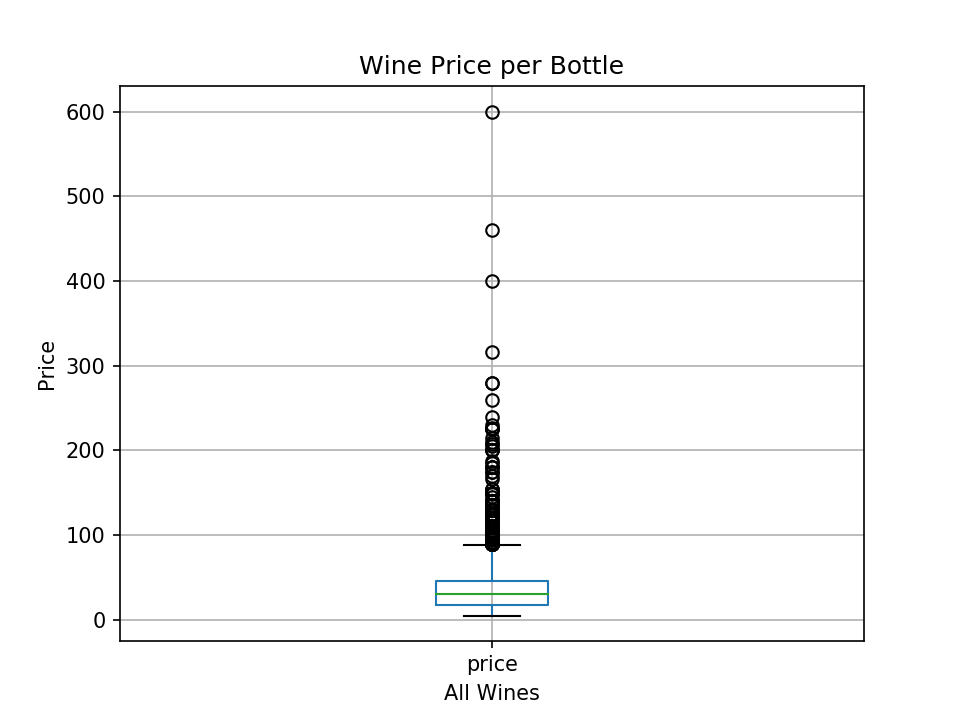

In [97]:
# Create a boxplot to compare means
fig = plt.figure()
fig = sample.boxplot("price", figsize=(20, 10))
fig.set_xlabel("All Wines")
fig.set_ylabel('Price')
fig.set_title('Wine Price per Bottle')
plt.savefig("Output/Price_Boxplot.png")

In [98]:
price = sample["price"]

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 18.0
The upper quartile of price is: 46.0
The interquartile range of price is: 28.0
The the median of price is: 30.0 
Values below -24.0 could be outliers.
Values above 88.0 could be outliers.


In [99]:
mean_numpy = np.mean(price)
print(f"The mean price for all wines is {mean_numpy}")

median_numpy = np.median(price)
print(f"The median price for all wines is {median_numpy}")

mode_scipy = st.mode(price)
print(f"The mode price for all wines is {mode_scipy}")

The mean price for all wines is 37.72493131868132
The median price for all wines is 30.0
The mode price for all wines is ModeResult(mode=array([30.]), count=array([146]))


In [100]:
#Drop Canada from Sample
sample = sample[sample.country != "Canada"]
print(sample.count())

designation    2909
winery         2909
variety        2909
region_1       2909
province       2909
country        2909
price          2909
points         2909
latitud        2909
longitud       2909
elevation      2909
dtype: int64


<IPython.core.display.Javascript object>


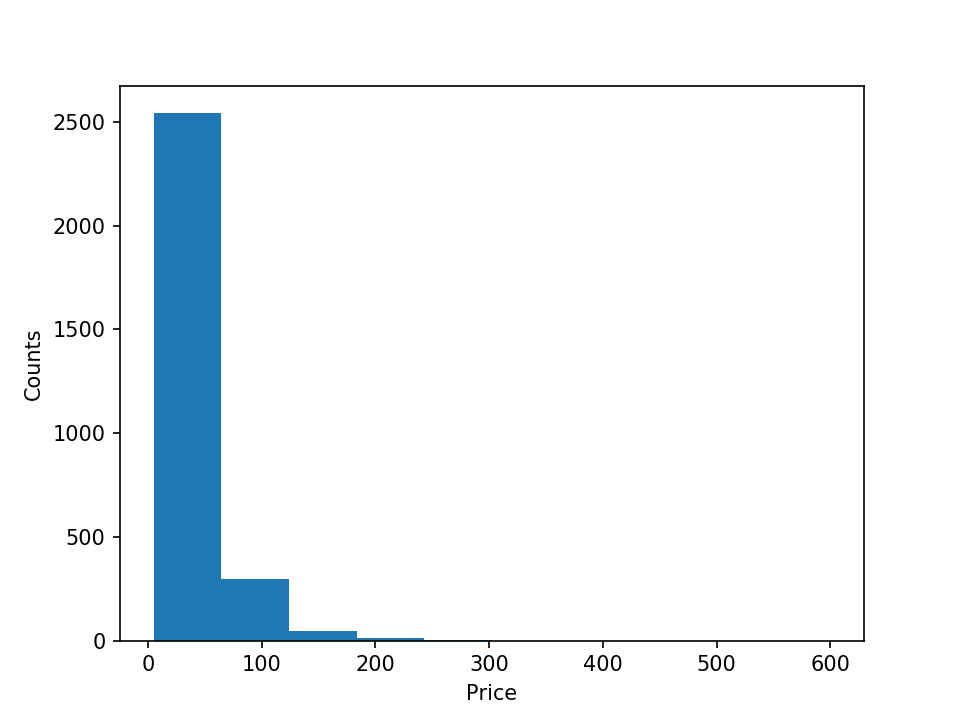

NormaltestResult(statistic=23.065578790731585, pvalue=9.803320576270698e-06)


In [118]:
# Characterize the data set using matplotlib and stats.normaltest
price = sample["price"]

fig = plt.figure()

plt.hist(price)
plt.xlabel("Price")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(price.sample(50)))

In [133]:
sample.describe()

,price,points,latitud,longitud,elevation
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000
mean,32.002913,87.998543,34.474762,-58.678726,271.589801
std,17.925691,3.172629,21.804369,73.656470,322.967928
min,5.000000,80.000000,-42.809838,-123.799459,0.666450
25%,18.000000,86.000000,37.599994,-122.219850,66.518057
50%,28.000000,88.000000,39.086566,-117.982638,188.564880
75%,42.000000,90.000000,44.661988,7.280982,353.410210
max,88.000000,97.000000,49.236201,153.288288,6907.093262


In [119]:
#Drop Price Outliers
sample = sample[sample.price <= 88]
print(sample.count())

designation    2746
winery         2746
variety        2746
region_1       2746
province       2746
country        2746
price          2746
points         2746
latitud        2746
longitud       2746
elevation      2746
dtype: int64


<IPython.core.display.Javascript object>


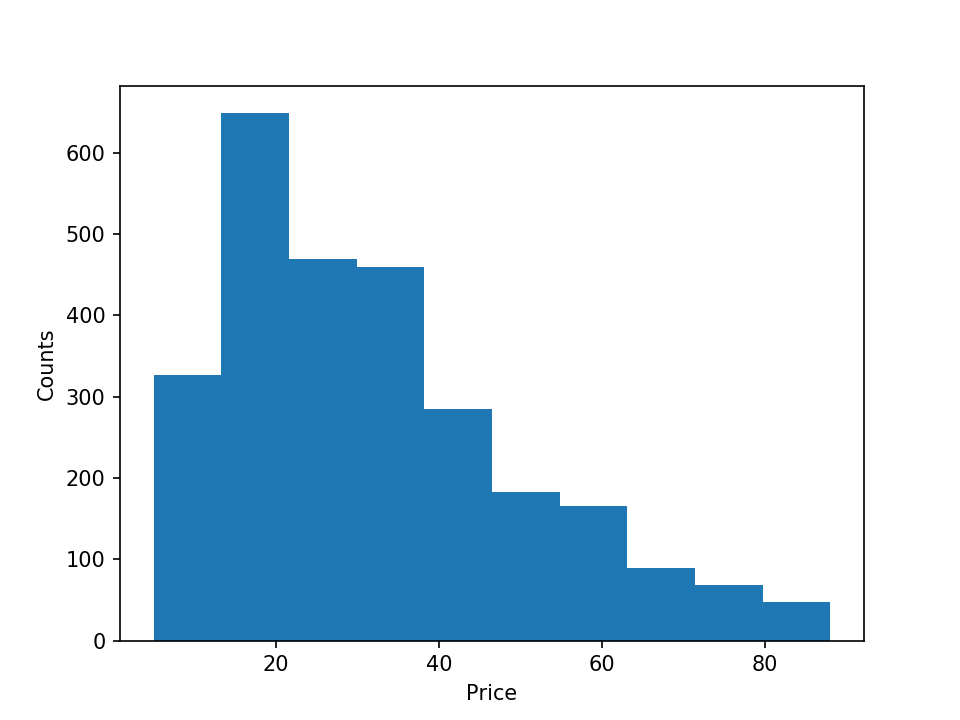

NormaltestResult(statistic=19.44904569028445, pvalue=5.979892671118648e-05)


In [120]:
# Characterize the data set using matplotlib and stats.normaltest
price = sample["price"]

fig = plt.figure()

plt.hist(price)
plt.xlabel("Price")
plt.ylabel('Counts')
plt.show()
print(st.normaltest(price.sample(50)))

In [121]:
mean_numpy = np.mean(price)
print(f"The mean price for all wines is {mean_numpy}")

median_numpy = np.median(price)
print(f"The median price for all wines is {median_numpy}")

mode_scipy = st.mode(price)
print(f"The mode price for all wines is {mode_scipy}")

The mean price for all wines is 32.00291332847779
The median price for all wines is 28.0
The mode price for all wines is ModeResult(mode=array([30.]), count=array([145]))


In [122]:
sample.groupby(["variety"]).mean()

,price,points,latitud,longitud,elevation
variety,,,,,
Aglianico,31.000000,88.400000,40.985284,6.350525,396.286303
Albana,21.000000,92.000000,44.596761,11.218640,24.282932
Albariño,21.500000,88.000000,39.427081,-64.740419,122.267037
Aligoté,20.000000,88.000000,47.169742,4.919957,404.149475
Alsace white blend,20.000000,86.333333,48.123004,7.315415,232.623586
...,...,...,...,...,...
White Blend,21.904762,86.825397,36.519099,-19.067046,370.146151
White Riesling,45.000000,95.000000,38.359256,-122.500636,98.696121
Xarel-lo,15.000000,87.000000,41.384722,1.806667,288.262054


In [123]:
sample.groupby(["winery"]).mean()

,price,points,latitud,longitud,elevation
winery,,,,,
14 Hands,22.000000,87.000000,46.211224,-119.746524,218.390427
42°S,20.000000,89.000000,-41.454520,145.970665,859.662781
460 Casina Bric,60.000000,88.000000,44.618181,7.928433,439.171570
:Nota Bene,27.000000,91.000000,47.519492,-122.312620,6.029534
Abacela,45.000000,88.000000,43.126965,-123.447495,200.858932
...,...,...,...,...,...
Zisola,55.000000,91.500000,36.871317,15.047227,133.781647
Zolo,25.000000,86.000000,-32.889459,-68.845839,768.765442
Zonin,8.666667,83.666667,39.391962,-19.046365,12.072543


In [147]:
summary = sample.groupby("country")["price", "points"].agg([np.mean, np.median, np.var, np.std])
summary

C:\Users\egarz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price                                   points         \
                mean median         var        std       mean median   
country                                                                
Argentina  19.389313   15.0  182.239577  13.499614  86.106870     86   
Australia  28.500000   20.5  348.913386  18.679223  88.062500     88   
France     32.216606   27.0  374.242767  19.345355  88.592058     89   
Italy      32.329502   26.0  350.355711  18.717791  88.226054     88   
Spain      23.490654   17.0  285.434185  16.894798  86.570093     86   
US         34.508141   32.0  285.258929  16.889610  88.176391     88   

                                
                 var       std  
country                         
Argentina   9.850029  3.138476  
Australia   7.948819  2.819365  
France      8.025009  2.832845  
Italy       6.470875  2.543791  
Spain       8.283796  2.878158  
US         11.481425  3.388425

In [125]:
#sample.groupby(["province"]).mean()

In [126]:
print(f"Variety unique count", (len(sample["variety"].unique())))
print(f"Winery unique count", (len(sample["winery"].unique())))
print(f"Country unique count", (len(sample["country"].unique())))
print(f"Province unique count", (len(sample["province"].unique())))

Variety unique count 172
Winery unique count 1762
Country unique count 6
Province unique count 48


<IPython.core.display.Javascript object>


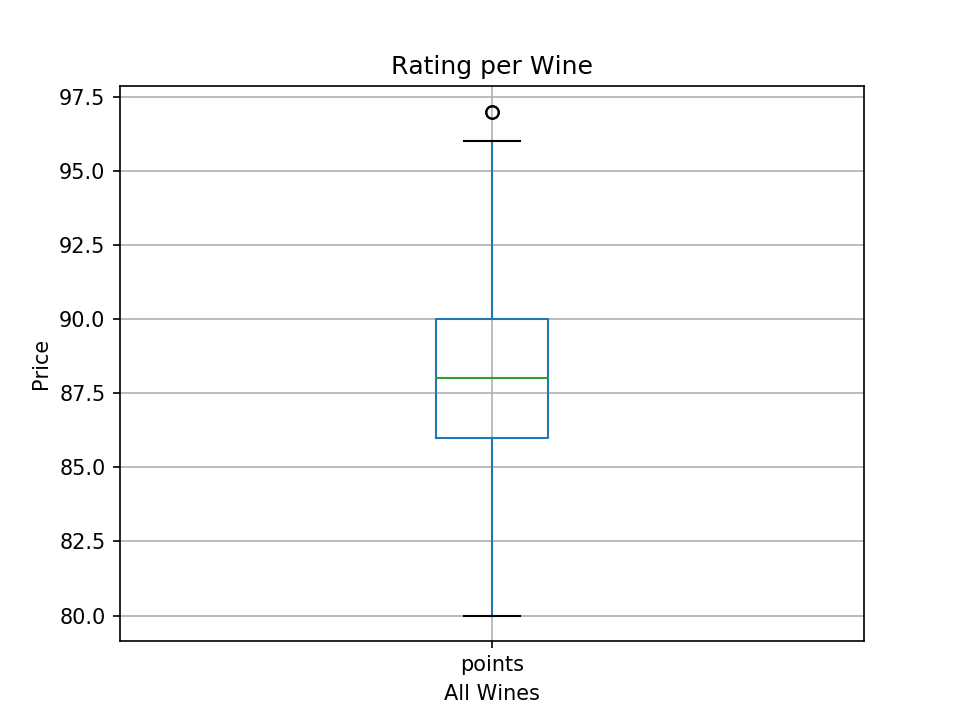

In [127]:
# Create a boxplot to compare means
fig = plt.figure()
fig = sample.boxplot("points", figsize=(20, 10))
fig.set_xlabel("All Wines")
fig.set_ylabel('Price')
fig.set_title('Rating per Wine')
plt.savefig("Output/Rating_Boxplot.png")

<IPython.core.display.Javascript object>


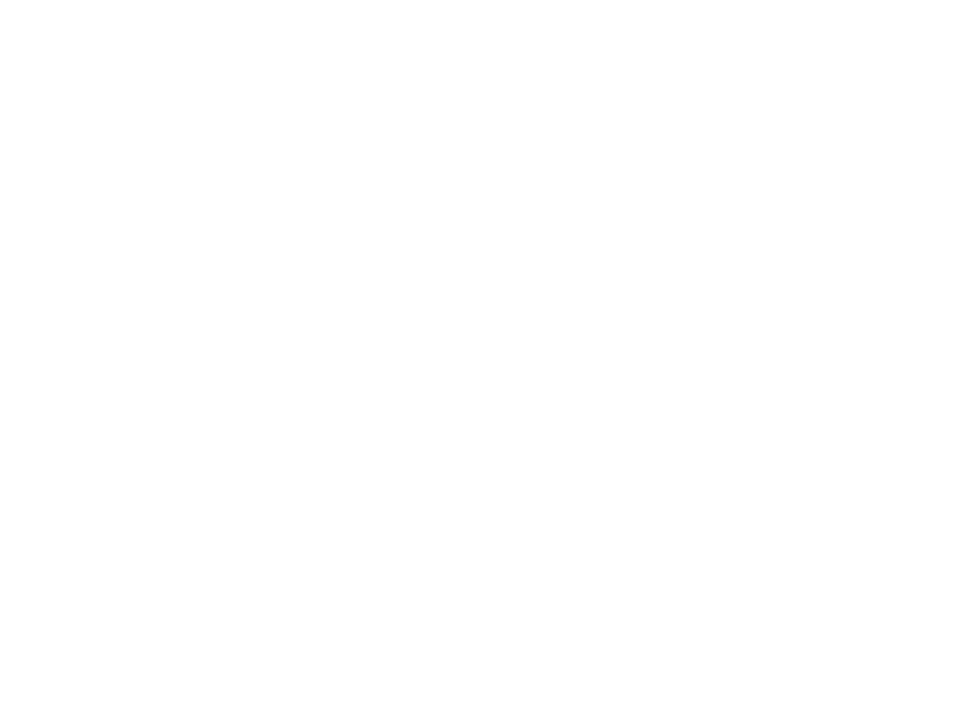

<IPython.core.display.Javascript object>


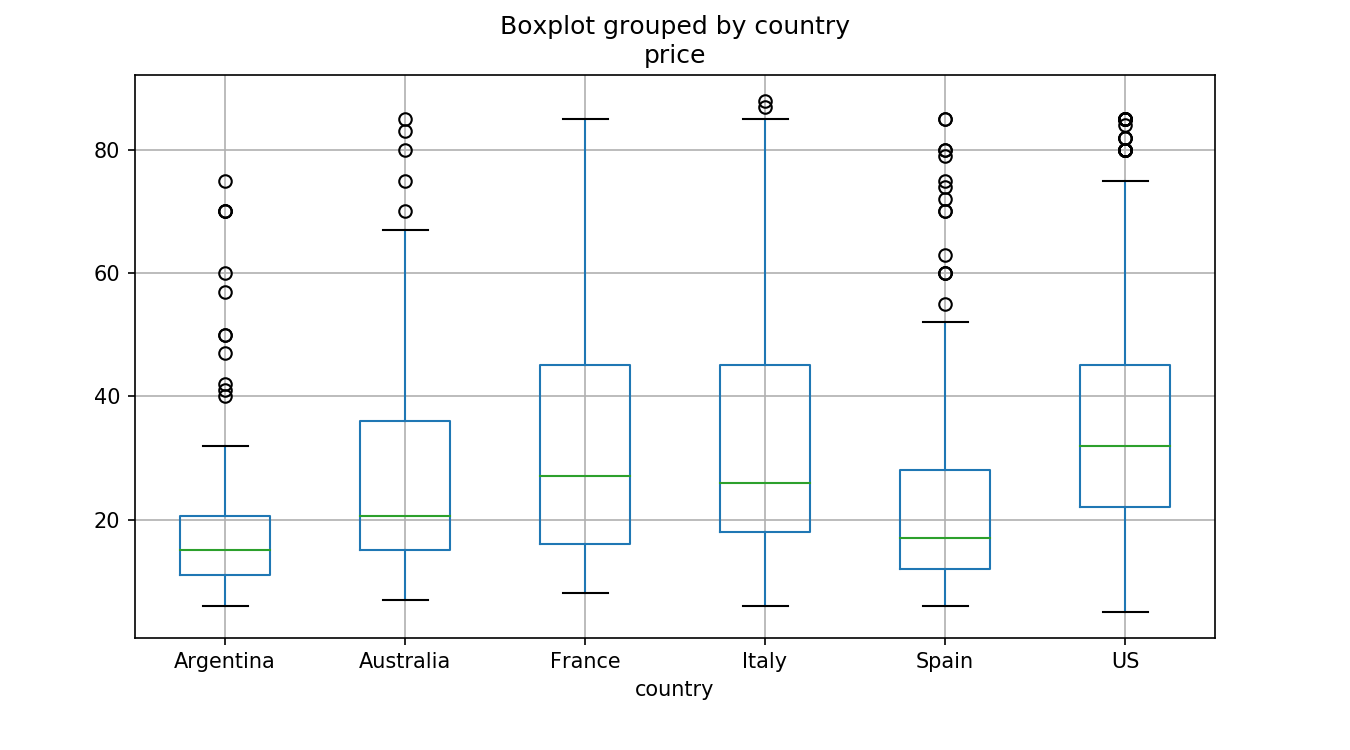

In [128]:
# Create a boxplot to compare means
fig = plt.figure()
sample.boxplot("price", by="country", figsize=(9, 5))
plt.savefig("Output/PriceperCountry.png")

In [129]:
# Extract individual groups
group1 = sample[sample["country"] == "Argentina"]["price"]
group2 = sample[sample["country"] == "Australia"]["price"]
group3 = sample[sample["country"] == "France"]["price"]
group4 = sample[sample["country"] == "Italy"]["price"]
group5 = sample[sample["country"] == "Spain"]["price"]
group6 = sample[sample["country"] == "US"]["price"]

In [130]:
# Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=31.009042720994167, pvalue=8.591193321210552e-31)

<IPython.core.display.Javascript object>


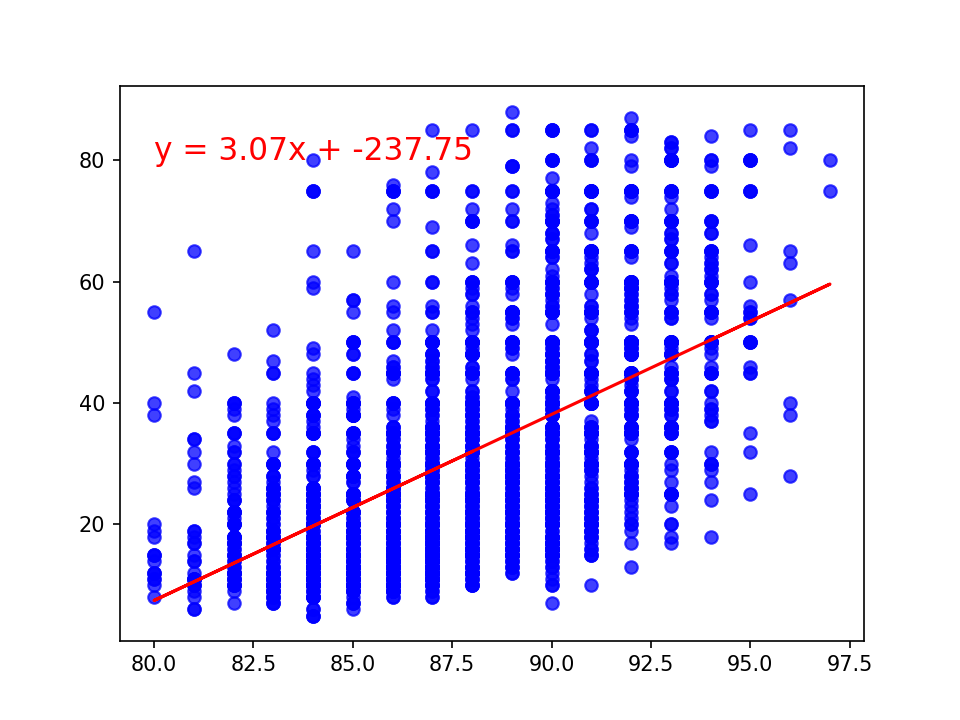

The correlation between both factors is 0.54
The r-squared is: 0.2943480778058886


In [131]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["points"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Precio vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(sample["points"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["points"], sample["price"])
regress_values = sample["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["points"],regress_values,"r-")
plt.annotate(line_eq,(80,80), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


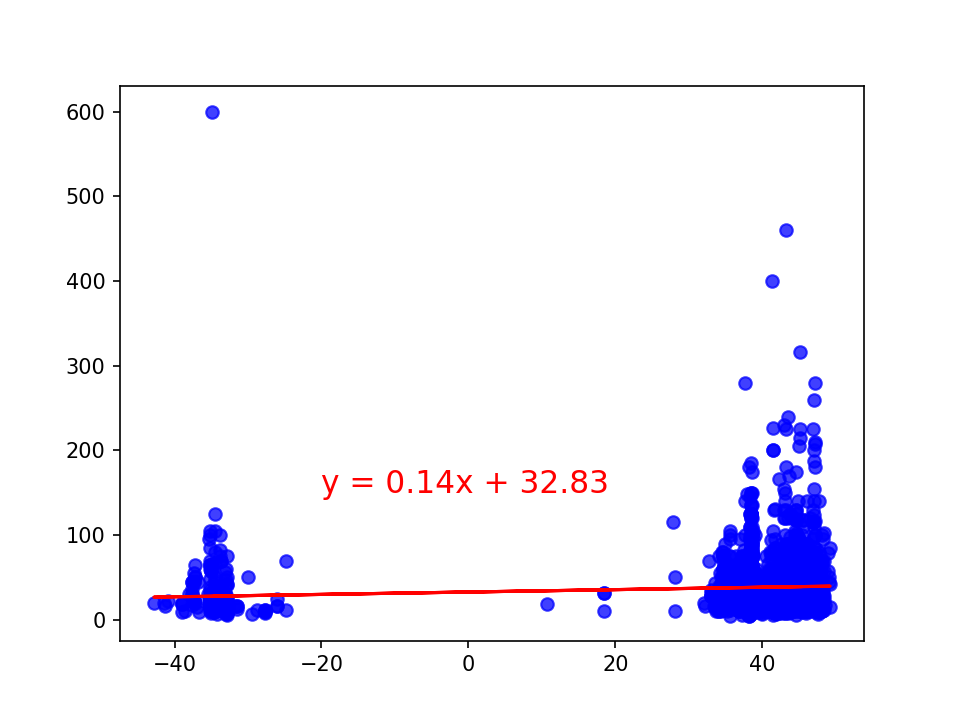

The correlation between both factors is 0.09
The r-squared is: 0.00840262054341151


In [114]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["latitud"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Latitude")

# Calculate correlation
correlation = round(st.pearsonr(sample["latitud"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["latitud"], sample["price"])
regress_values = sample["latitud"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["latitud"],regress_values,"r-")
plt.annotate(line_eq,(-20,150), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


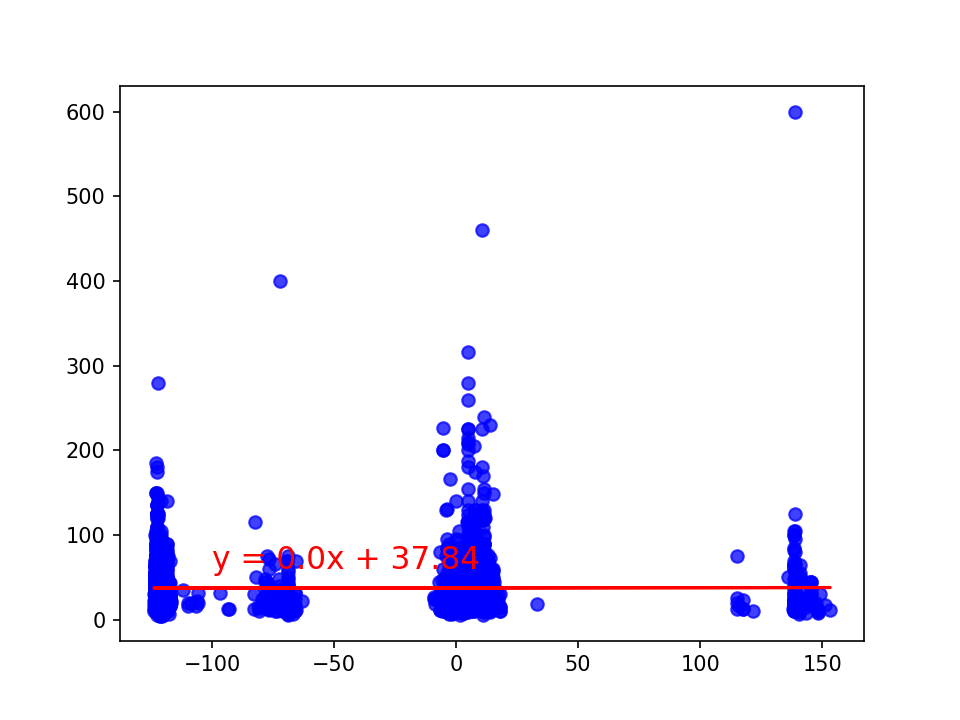

The correlation between both factors is 0.0
The r-squared is: 1.8408108118312515e-05


In [115]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["longitud"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Longitude")

# Calculate correlation
correlation = round(st.pearsonr(sample["longitud"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["longitud"], sample["price"])
regress_values = sample["longitud"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["longitud"],regress_values,"r-")
plt.annotate(line_eq,(-100,60), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


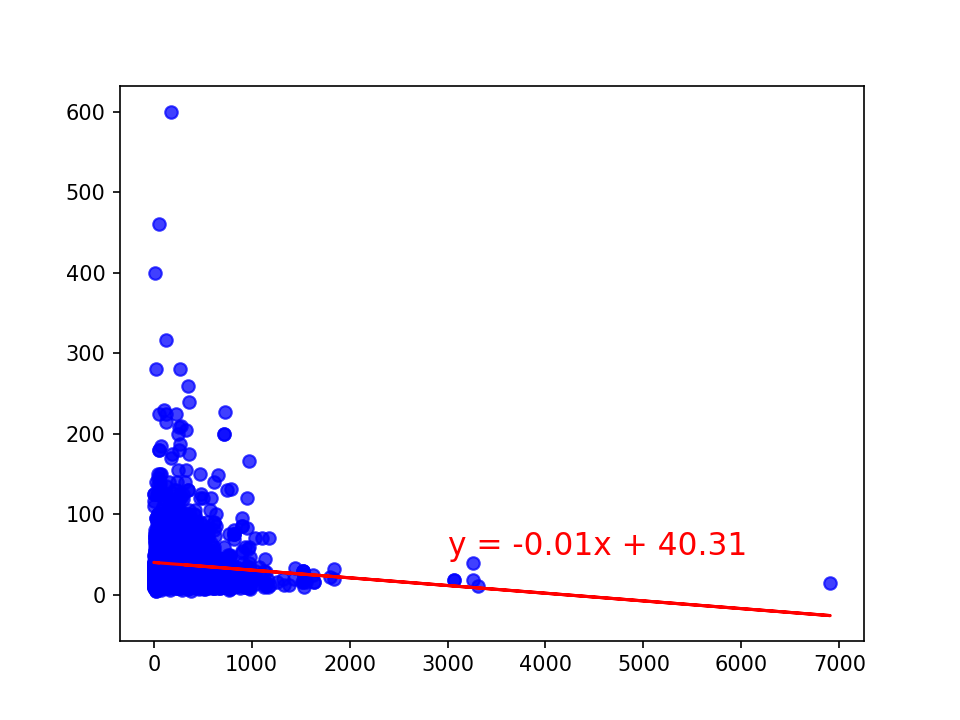

The correlation between both factors is -0.09
The r-squared is: 0.00838413962319553


In [116]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["elevation"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Elevation")

# Calculate correlation
correlation = round(st.pearsonr(sample["elevation"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["elevation"], sample["price"])
regress_values = sample["elevation"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["elevation"],regress_values,"r-")
plt.annotate(line_eq,(3000,50), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


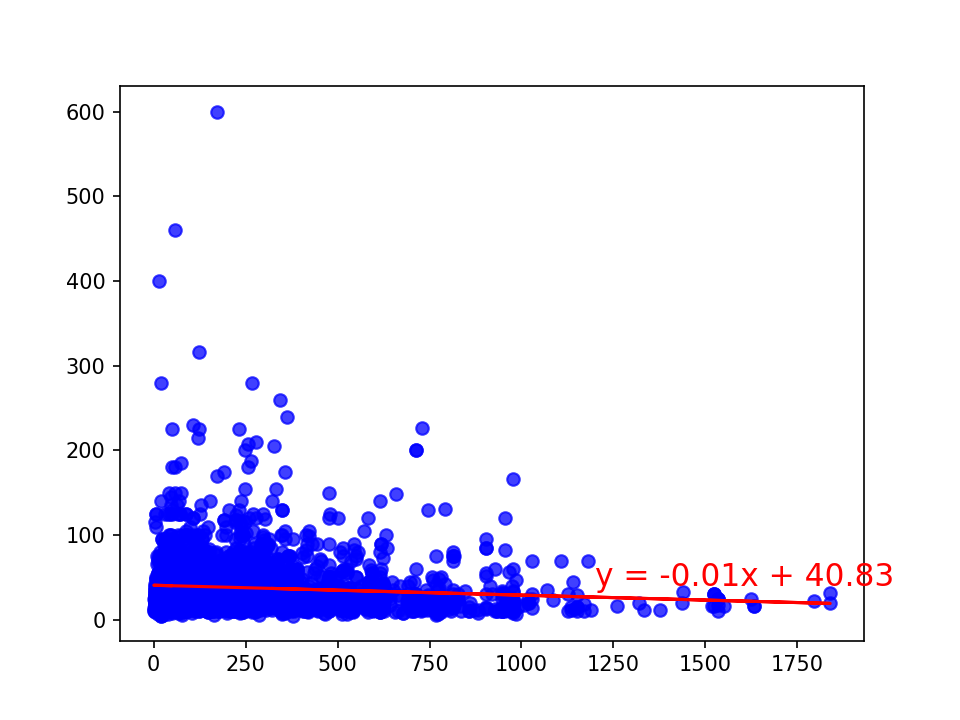

The correlation between both factors is -0.09
The r-squared is: 0.008801509116979024


In [117]:
cond1 = sample.loc[sample['elevation']<2000]

fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(cond1["elevation"], cond1["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Elevation")

# Calculate correlation
correlation = round(st.pearsonr(cond1["elevation"], cond1["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(cond1["elevation"], cond1["price"])
regress_values = cond1["elevation"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(cond1["elevation"],regress_values,"r-")
plt.annotate(line_eq,(1200,40), fontsize=15,color="red")

# Print chart to screen
plt.show()

In [ ]:
#Regress by Country
group1 = sample[sample["country"] == "Argentina"]["price"]

<IPython.core.display.Javascript object>


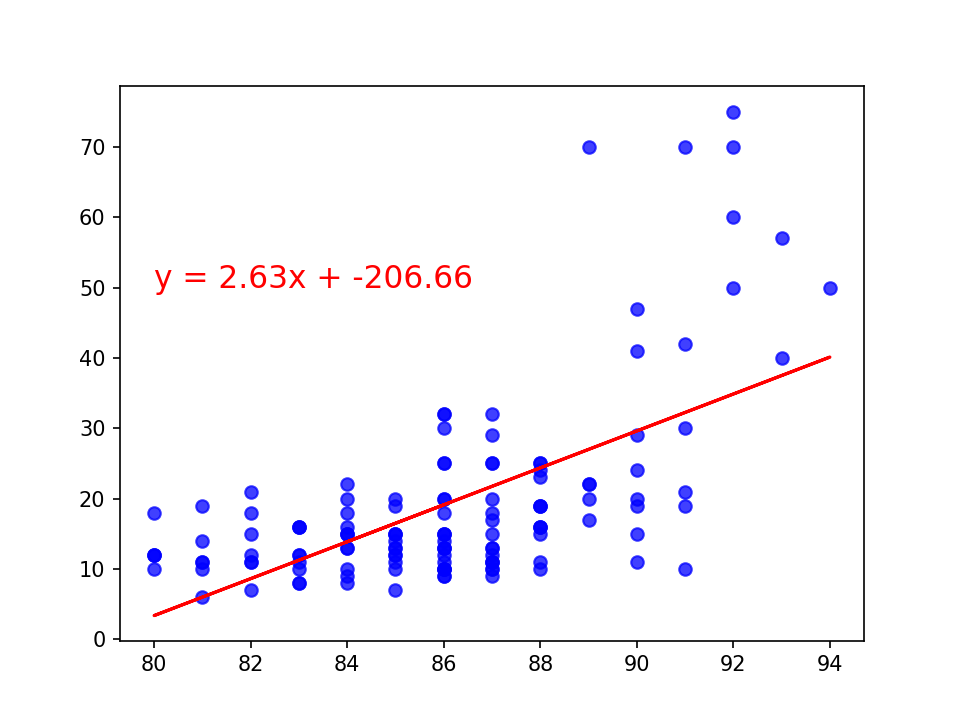

The correlation between both factors is 0.61
The r-squared is: 0.3724878603227943


In [42]:
fig = plt.figure()

# Create scatter plot based for Argentina
argentina = sample[sample["country"] == "Argentina"]
plt.scatter(argentina["points"], argentina["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(argentina["points"], argentina["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(argentina["points"], argentina["price"])
regress_values = argentina["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(argentina["points"],regress_values,"r-")
plt.annotate(line_eq,(80,50), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


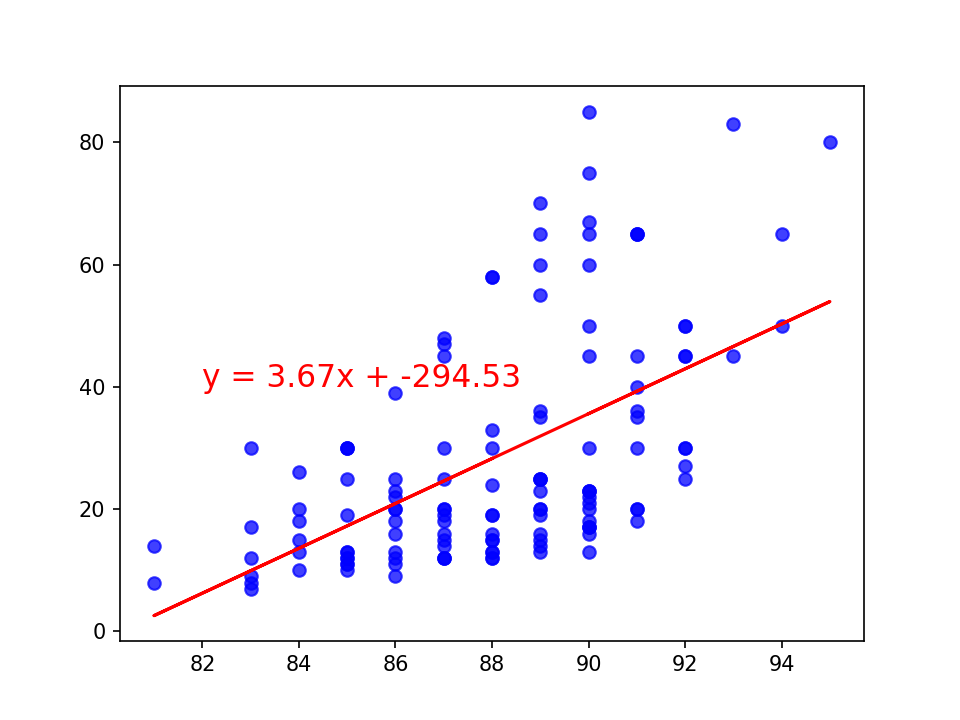

The correlation between both factors is 0.55
The r-squared is: 0.3065347737744363


In [46]:
fig = plt.figure()

# Create scatter plot based for Argentina
australia = sample[sample["country"] == "Australia"]
plt.scatter(australia["points"], australia["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(australia["points"], australia["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(australia["points"], australia["price"])
regress_values = australia["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(australia["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


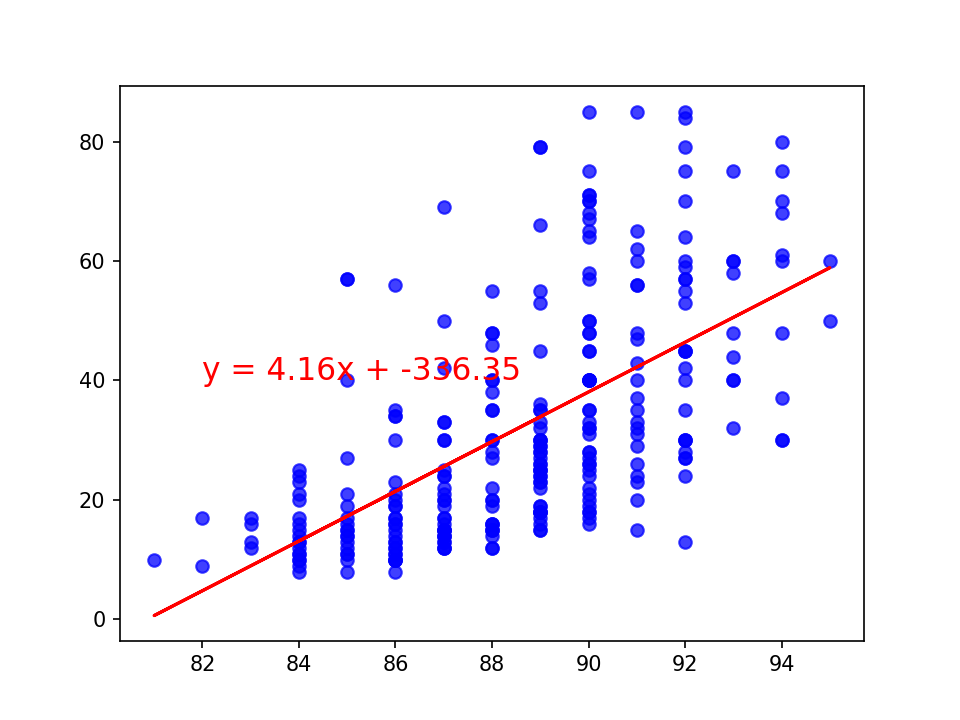

The correlation between both factors is 0.61
The r-squared is: 0.3711284270446284


In [47]:
fig = plt.figure()

# Create scatter plot based for Argentina
france = sample[sample["country"] == "France"]
plt.scatter(france["points"], france["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(france["points"], france["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(france["points"], france["price"])
regress_values = france["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(france["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


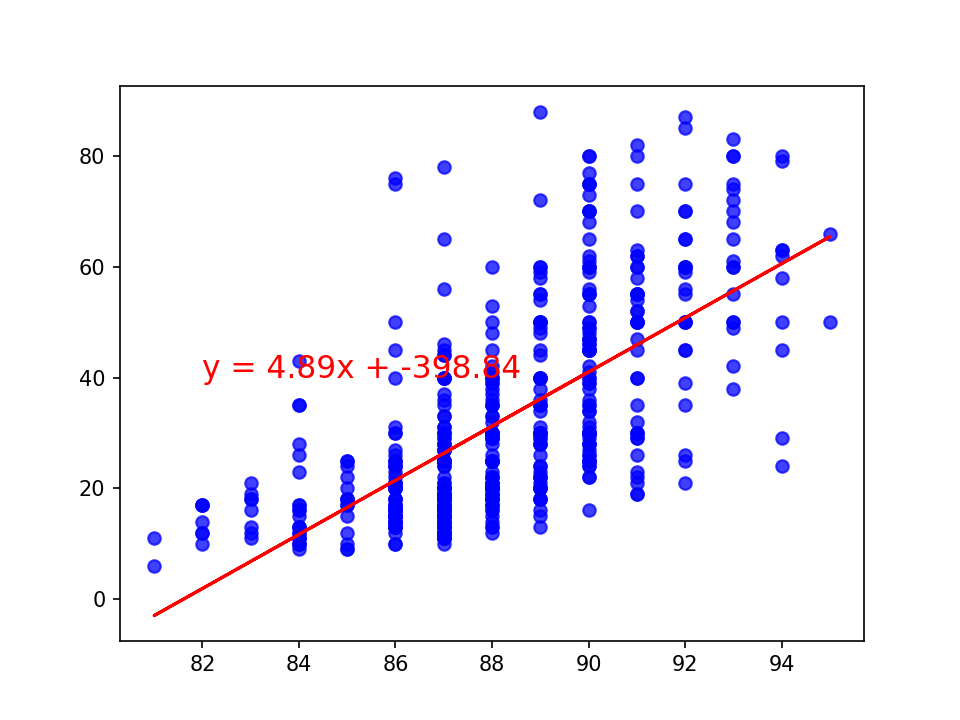

The correlation between both factors is 0.66
The r-squared is: 0.4411255325435049


In [48]:
fig = plt.figure()

# Create scatter plot based for Argentina
italy = sample[sample["country"] == "Italy"]
plt.scatter(italy["points"], italy["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(italy["points"], italy["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(italy["points"], italy["price"])
regress_values = italy["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(italy["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


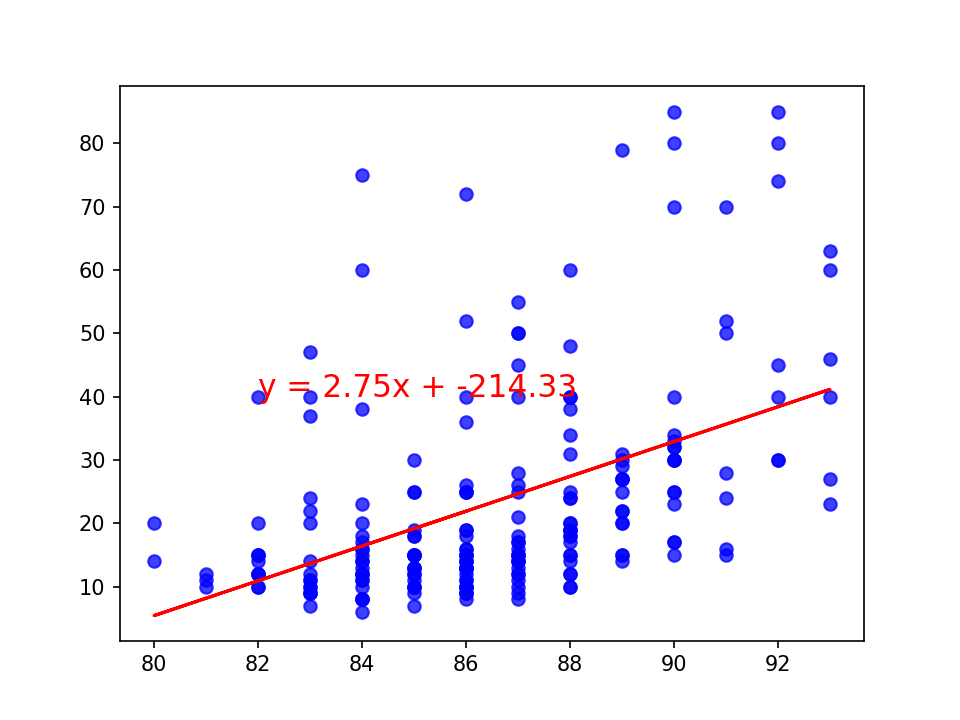

The correlation between both factors is 0.47
The r-squared is: 0.21901636254437293


In [49]:
fig = plt.figure()

# Create scatter plot based for Argentina
spain = sample[sample["country"] == "Spain"]
plt.scatter(spain["points"], spain["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(spain["points"], spain["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(spain["points"], spain["price"])
regress_values = spain["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(spain["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

# Print chart to screen
plt.show()

<IPython.core.display.Javascript object>


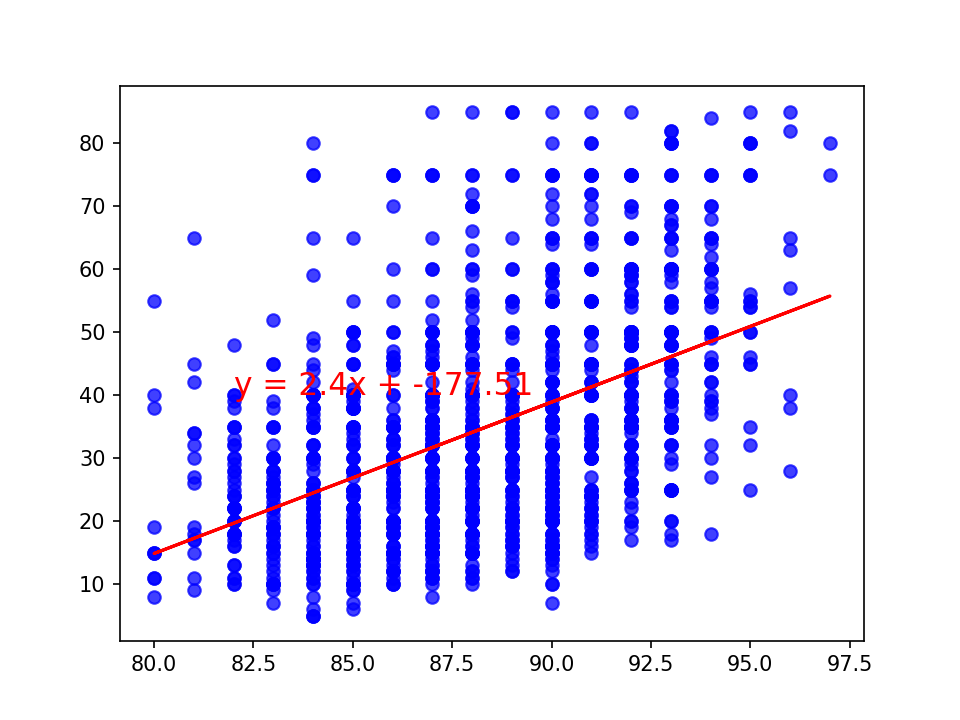

The correlation between both factors is 0.48
The r-squared is: 0.23270115709101807


In [50]:
fig = plt.figure()

# Create scatter plot based for Argentina
US = sample[sample["country"] == "US"]
plt.scatter(US["points"], US["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(US["points"], US["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(US["points"], US["price"])
regress_values = US["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(US["points"],regress_values,"r-")
plt.annotate(line_eq,(82,40), fontsize=15,color="red")

# Print chart to screen
plt.show()

In [88]:
sample['country'] = sample['country'].replace({'Argentina':"1",
                                               )
sample['country'] = sample['country'].replace(['Australia'],"2")
sample['country'] = sample['country'].replace(['France'],"3")
sample['country'] = sample['country'].replace(['Italy'],"4")
sample['country'] = sample['country'].replace(['Spain'],"5")
sample['country'] = sample['country'].replace(['US'],"6")
pd.to_numeric(sample['country'])
#sample['country'].astype(int)
sample.head()
sample.dtypes

designation     object
winery          object
variety         object
region_1        object
province        object
country         object
price          float64
points           int64
latitud        float64
longitud       float64
elevation      float64
dtype: object

<IPython.core.display.Javascript object>


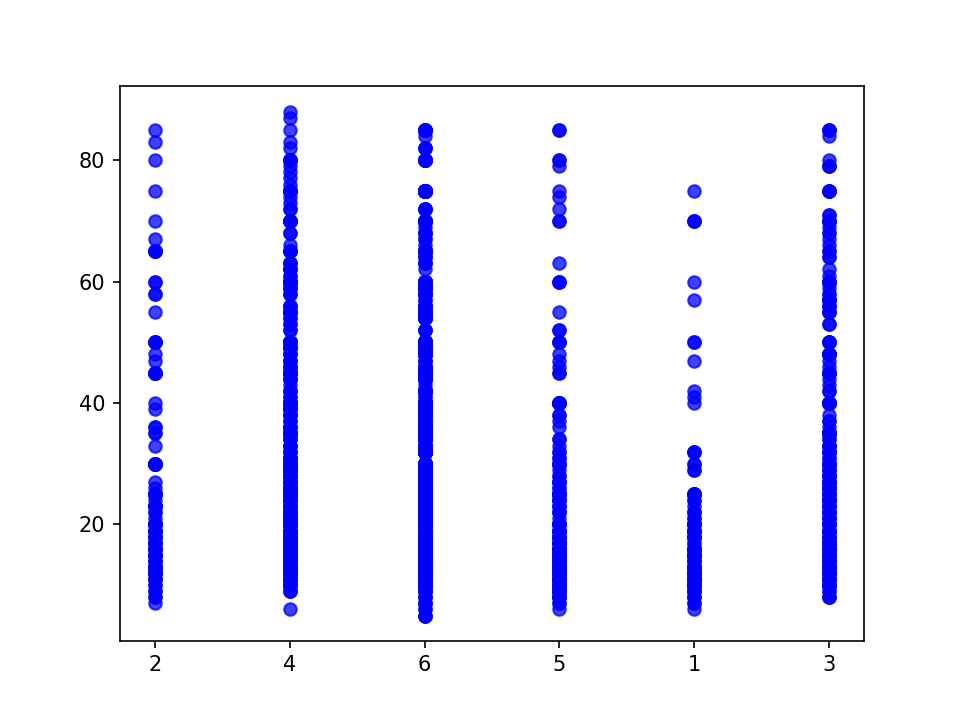

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [86]:
fig = plt.figure()

# Create scatter plot based uponabove values
plt.scatter(sample["country"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Price vs Country")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["country"], sample["price"])
regress_values = sample["country"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["country"],regress_values,"r-")
plt.annotate(line_eq,(3,50), fontsize=15,color="red")

# Print chart to screen
plt.show()